## Задание 4 

**Студент:**  Заколпина Анастасия Николаевна  
**Группа:**  М01-504а  
**Преподаватель:**  Дьяченко Роман Александрович
**Дата выполнения:**  9 ноября 2025 г.

**Цель работы:**  Научиться создавать и обрабатывать скалярные поля, привязанные к облакам точек с помощью Python и NumPy. Закрепить навыки обработки численных массивов, визуализации и анализа данных.

In [26]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d
import pandas as pd

In [27]:
try:
    import open3d as o3d
    pcd = o3d.io.read_point_cloud("b1.ply")
    if len(pcd.points) == 0:
        raise ValueError("Точки отсутствуют")
    
    xyz = np.asarray(pcd.points)
    print(f"Успешно загружено {xyz.shape[0]} точек из 'b1.ply'.")
    
except Exception as e:
    print(f"Не удалось загрузить 'b1.ply' ({type(e).__name__}): {e}")
    
    N = 500
    np.random.seed(42)
    xyz = np.random.uniform(-10, 10, size=(N, 3))
    np.savetxt('cloud.txt', xyz, fmt='%.4f')
    print(f"Сгенерировано {xyz.shape[0]} точек.")

print(f"\n Форма данных: {xyz.shape}")
print("Первые 3 точки:\n", xyz[:3])

Успешно загружено 30095 точек из 'b1.ply'.

 Форма данных: (30095, 3)
Первые 3 точки:
 [[16. 82. 13.]
 [17. 82. 13.]
 [18. 82. 13.]]


In [28]:
def create_constant_scalar(n_points, value=10.0):
    return np.full(n_points, value)

scalar_field = create_constant_scalar(xyz.shape[0], value=10.0)

print("Скалярное поле (первые 5 значений):", scalar_field[:5])
print("Варианты:")
print("   value=5  →", create_constant_scalar(N, 5)[:3])
print("   value=15 →", create_constant_scalar(N, 15)[:3])
print("   value=-3.5 →", create_constant_scalar(N, -3.5)[:3])

Скалярное поле (первые 5 значений): [10. 10. 10. 10. 10.]
Варианты:
   value=5  → [5 5 5]
   value=15 → [15 15 15]
   value=-3.5 → [-3.5 -3.5 -3.5]


In [29]:
# Задание 2: умножение на коэффициент
scalar_field_original = scalar_field.copy()

scalar_field *= 2
print("После ×2:", scalar_field[:5])

# Варианты:
print("\nВарианты умножения (на базе исходного поля):")
print(" ×0.5  :", (scalar_field_original * 0.5)[:3])
print(" ×(-1) :", (scalar_field_original * -1)[:3])
print(" ×3    :", (scalar_field_original * 3)[:3])

После ×2: [20. 20. 20. 20. 20.]

Варианты умножения (на базе исходного поля):
 ×0.5  : [5. 5. 5.]
 ×(-1) : [-10. -10. -10.]
 ×3    : [30. 30. 30.]


In [30]:
# Задание 3: прибавить число
scalar_field += 5
print("После +5:", scalar_field[:5])

# Восстановим original для дальнейших экспериментов (чтобы не накапливать эффекты)
scalar_field = scalar_field_original.copy() * 2 + 5  # теперь = 10*2+5 = 25
print("Текущее поле (const=25):", scalar_field[:3])

После +5: [25. 25. 25. 25. 25.]
Текущее поле (const=25): [25. 25. 25.]


Исходное поле (первые 8): [25. 25. 25. 25. 25. 25. 25. 25.]
σ=1 → [25. 25. 25. 25. 25. 25. 25. 25.]
σ=2 → [25. 25. 25. 25. 25. 25. 25. 25.]
σ=5 → [25. 25. 25. 25. 25. 25. 25. 25.]


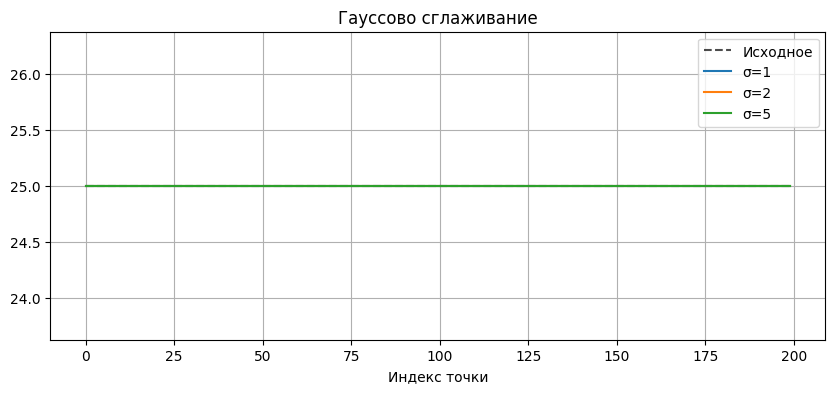

In [ ]:
# Задание 4: гауссов фильтр
sigma_vals = [1, 2, 5]
smoothed = {}
for s in sigma_vals:
    smoothed[s] = gaussian_filter1d(scalar_field, sigma=s)

print("Исходное поле (первые 8):", scalar_field[:8])
for s in sigma_vals:
    print(f"σ={s} →", smoothed[s][:8])

# Визуализация (первые 200 точек)
x = np.arange(200)
plt.figure(figsize=(10, 4))
plt.plot(x, scalar_field[:200], 'k--', label='Исходное', alpha=0.7)
for s in sigma_vals:
    plt.plot(x, smoothed[s][:200], label=f'σ={s}')
plt.legend(); plt.grid(); plt.title('Гауссово сглаживание'); plt.xlabel('Индекс точки')
plt.show()

In [34]:
# Задание 5: градиент
grad_raw = np.gradient(scalar_field)
print("Градиент (равномерное поле → почти ноль):", grad_raw[:10])

dist_field = np.linalg.norm(xyz, axis=1)  # r = sqrt(x²+y²+z²)
grad_dist = np.gradient(dist_field)
print("\nГрадиент поля расстояния (первые 5):", grad_dist[:5])

Градиент (равномерное поле → почти ноль): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Градиент поля расстояния (первые 5): [0.19492206 0.20058442 0.21186802 0.22306754 0.23417943]


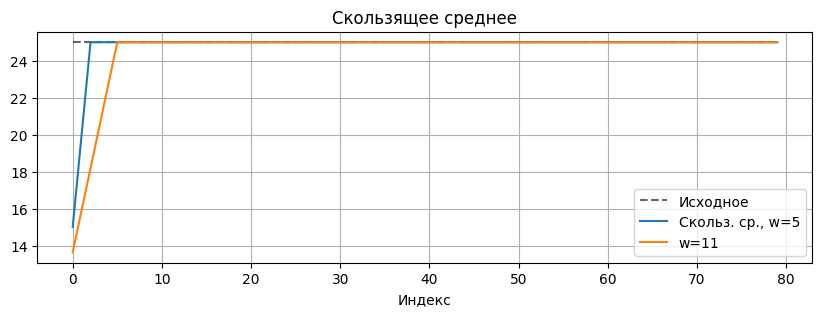

In [35]:
# Задание 6: скользящее среднее
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

ma3 = moving_average(scalar_field, 3)
ma5 = moving_average(scalar_field, 5)
ma11 = moving_average(scalar_field, 11)

x = np.arange(80)
plt.figure(figsize=(10, 3))
plt.plot(x, scalar_field[:80], 'k--', label='Исходное', alpha=0.6)
plt.plot(x, ma5[:80], label='Скольз. ср., w=5')
plt.plot(x, ma11[:80], label='w=11')
plt.legend(); plt.grid(); plt.title('Скользящее среднее'); plt.xlabel('Индекс')
plt.show()

In [36]:
# Задание 7: скаляр → RGB
def scalar_to_rgb(scalar, cmap='viridis'):
    normed = (scalar - scalar.min()) / (scalar.max() - scalar.min() + 1e-8)
    return plt.cm.get_cmap(cmap)(normed)[:, :3]

colors = scalar_to_rgb(dist_field, 'plasma')  # используем dist_field — он неоднородный
print("Цвета (RGB, первые 3):")
for i in range(3):
    print(f"  точка {i}: {colors[i]}")

Цвета (RGB, первые 3):
  точка 0: [0.529306 0.027747 0.651586]
  точка 1: [0.534952 0.031217 0.650165]
  точка 2: [0.534952 0.031217 0.650165]


C:\Users\anast\AppData\Local\Temp\ipykernel_7192\1748606539.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  return plt.cm.get_cmap(cmap)(normed)[:, :3]


In [37]:
# Задание 8: статистика
sf = dist_field  # работаем с осмысленным полем — расстояние
mean_val = sf.mean()
std_val = sf.std()
min_val = sf.min()
max_val = sf.max()

stats = pd.DataFrame({
    'Метрика': ['Среднее', 'Стд. откл.', 'Минимум', 'Максимум'],
    'Значение': [f"{mean_val:.3f}", f"{std_val:.3f}", f"{min_val:.3f}", f"{max_val:.3f}"]
})
print("Статистика поля расстояния:")
display(stats)

Статистика поля расстояния:


,Метрика,Значение
0,Среднее,125.980
1,Стд. откл.,26.012
2,Минимум,47.529
3,Максимум,181.166


In [38]:
# Задание 9: нормализация
normed = (sf - min_val) / (max_val - min_val + 1e-8)

print(f"До: min={sf.min():.2f}, max={sf.max():.2f}")
print(f"После: min={normed.min():.2f}, max={normed.max():.2f}")
print("Первые 5 нормализованных значений:", normed[:5])

До: min=47.53, max=181.17
После: min=0.00, max=1.00
Первые 5 нормализованных значений: [0.27704075 0.27849935 0.28004269 0.28167015 0.28338111]


In [39]:
# Задание 10: интерполяция пропусков
sf_with_nan = sf.copy()
nan_idx = np.random.choice(len(sf), 20, replace=False)
sf_with_nan[nan_idx] = np.nan

def interpolate_nan(data):
    mask = np.isnan(data)
    if not mask.any():
        return data
    x = np.arange(len(data))
    f = interp1d(x[~mask], data[~mask], kind='linear', 
                 bounds_error=False, fill_value="extrapolate")
    return f(x)

filled = interpolate_nan(sf_with_nan)

print(f"Было NaN: {np.isnan(sf_with_nan).sum()}")
print(f"Стало NaN: {np.isnan(filled).sum()}")
print("\nПримеры заполнения (индексы):", nan_idx[:5])
for i in nan_idx[:5]:
    print(f"  {i}: было {sf_with_nan[i]:.2f} → стало {filled[i]:.2f}")

Было NaN: 20
Стало NaN: 0

Примеры заполнения (индексы): [ 3689 18796 24572  9314  7267]
  3689: было nan → стало 117.30
  18796: было nan → стало 119.62
  24572: было nan → стало 113.94
  9314: было nan → стало 126.61
  7267: было nan → стало 103.57


In [40]:
# Задание 11: фильтрация
mask = (sf >= 5) & (sf <= 12)  # точки на расстоянии 5–12 от центра
filtered_xyz = xyz[mask]

print(f"Всего точек: {len(xyz)}")
print(f"В диапазоне [5, 12]: {len(filtered_xyz)} точек ({len(filtered_xyz)/len(xyz)*100:.1f}%)")

# Варианты:
print("\nДругие диапазоны:")
print(f"  [0, 5]    → {((sf >= 0) & (sf < 5)).sum()} точек")
print(f"  [12, ∞)   → {(sf >= 12).sum()} точек")

Всего точек: 30095
В диапазоне [5, 12]: 0 точек (0.0%)

Другие диапазоны:
  [0, 5]    → 0 точек
  [12, ∞)   → 30095 точек


In [41]:
# Задание 12: замена Z на скалярное поле
xyz_new = xyz.copy()
xyz_new[:, 2] = sf  # Z = расстояние от центра → "поднимаем" по высоте

print("До замены Z (3 точки):\n", xyz[:3])
print("\nПосле замены Z:\n", xyz_new[:3])

До замены Z (3 точки):
 [[16. 82. 13.]
 [17. 82. 13.]
 [18. 82. 13.]]

После замены Z:
 [[16.         82.         84.5517593 ]
 [17.         82.         84.74668135]
 [18.         82.         84.95292814]]


In [42]:
# Задание 13: удаление
print("До: переменная 'scalar_field' существует?", 'scalar_field' in globals())

del scalar_field


До: переменная 'scalar_field' существует? True


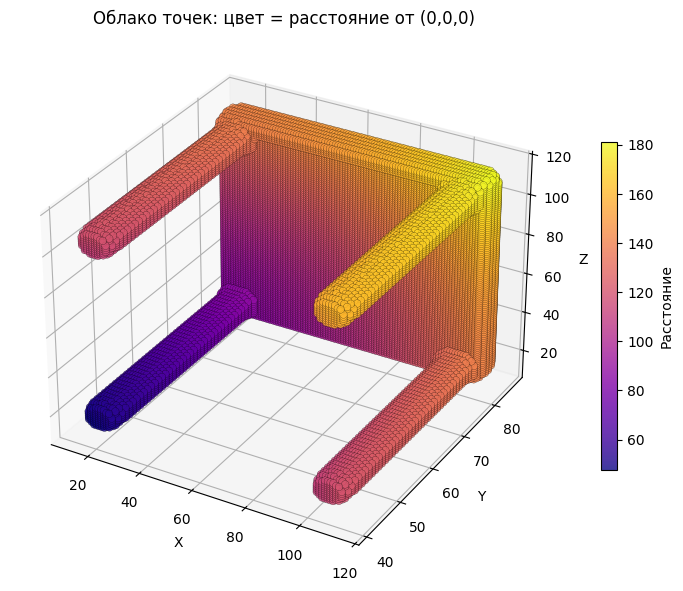

In [43]:
# 3D-визуализация: облако точек, цвет = расстояние от центра
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2],
                c=sf, cmap='plasma', s=30, alpha=0.8, edgecolor='k', linewidth=0.2)

ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.set_title('Облако точек: цвет = расстояние от (0,0,0)')
plt.colorbar(sc, ax=ax, label='Расстояние', shrink=0.6)
plt.tight_layout()
plt.show()

In [44]:
try:
    import open3d as o3d
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(xyz)
    pcd.colors = o3d.utility.Vector3dVector(colors)
    print("✅ Open3D: отображаем 3D-облако...")
    o3d.visualization.draw_geometries([pcd], window_name="Open3D визуализация")
except ImportError:
    print("⚠️  open3d не установлен. Пропускаем 3D-рендеринг.")

✅ Open3D: отображаем 3D-облако...


## Ответы на вопросы по облакам точек и скалярным полям
1. **Что такое облако точек? Какие данные оно обычно содержит?**
   - Облако точек — это набор точек в 3D-пространстве, представляющий поверхность или объект. Обычно содержит координаты (X, Y, Z), может также включать цвет (RGB), интенсивность, нормали, временные метки и другие атрибуты.

2. **Что такое скалярное поле в контексте облака точек?**
   - Скалярное поле — это функция, сопоставляющая каждой точке облака некоторое скалярное (числовое) значение. Например: высота, интенсивность, температура, плотность, изогнутость поверхности.

3. **Как можно связать скалярное поле с точками?**
   - Через массив значений, где i-й элемент массива соответствует i-й точке в облаке. Обычно хранится отдельным массивом, синхронизированным по индексу.

4. **Приведите примеры реальных скалярных полей (например, в данных LIDAR или фотограмметрии).**
   - В LIDAR: интенсивность отражённого сигнала, номер отражения, высота.
   - В фотограмметрии: ошибка реконструкции, метрика качества текстуры, высота над уровнем моря.

5. **Как с помощью NumPy создать массив скалярных значений для точек?**
   ```python
   import numpy as np
   scalar_field = np.random.rand(num_points)  # пример: случайные значения
   
